In [1]:
#print(valid_r_preds[:, 1])
#calculate the predictions of it being real for all, fake is the oppostion
import matplotlib
from matplotlib import pyplot as plt
#final_guesses[:len(valid_r)]

In [2]:
import numpy as np
import pandas as pd
import os
import time
import pickle

Use the native Bayes Algorithm

In [3]:
def valid_val(key_val, dict_list, p, m, total):
    #m is the total unseen events added
    #p is the prior
    #aka delta smoothing
    try:
        val = dict_list[key_val]
    except:
        val = 0
    final_val = (val+(m*p))/(total +m)
    return final_val

In [4]:
def generate_guesses(total_valids, unique_keys, prob_real, prob_fake):
    print(len(total_valids))
    final_guesses = np.zeros(len(total_valids))
    print(final_guesses.shape)
    print("Real Valid DataSet")
    for i, line in enumerate(total_valids):
        #if i == len(valid_r):
        #    print("\nFake Valid Data set\n")
        words = line.split(" ")
        real_preds = np.zeros(len(unique_keys))
        fake_preds   = np.zeros_like(real_preds)
        for j, word in enumerate(unique_keys):
            #prob assuming its real
            if word in words:
                real_preds[j] = prob_real[word]
            else:
                real_preds[j] = 1 - prob_real[word]
            #prob assuming its false
            if word in words:
                fake_preds[j] = prob_fake[word]
            else:
                fake_preds[j] = 1 - prob_fake[word]

        #final prob that its real given these words
        vals = np.exp(np.sum(np.log(real_preds), axis = 0)) * p_real
        vals2 = np.exp(np.sum(np.log(fake_preds), axis= 0)) *p_fake
        prob = vals/(vals+vals2)
        #print("P:", prob)
        final_guesses[i] = prob
    return final_guesses
    

In [5]:
#real_news_probs = np.zeros((len(valid_r), ))
#create hashmap of probabilities?

def generate_probs(total_train, delta = 0.01, corpus= 10000):
    prob_real = {}
    prob_fake = {}
    for j, line in enumerate(total_train):
        words = line.split(" ")
        vals_bad = np.zeros(len(words))
        vals_good = np.zeros_like(vals_bad)
        for i, word in enumerate(words):
            #the prob of (keywords) given class label
            val = valid_val(word, train_r_counts, delta, corpus, total_real) #train_r_counts[word]
            val2 = valid_val(word, train_b_counts, delta, corpus, total_fake)    
            try:
                prob_real[word]
            except:
                prob_real[word] = val
            try:
                prob_fake[word]
            except:
                prob_fake[word] = val2

        #if j %100 ==99:
        #    print("Line:", j)
    unique_real = list(prob_real.keys())
    unique_fake = list(prob_fake.keys())
    unique_real.extend(unique_fake)
    unique_keys = np.unique(unique_real)
    unique_keys.sort()
    print(len(unique_keys))
    return prob_real, prob_fake, unique_keys

In [6]:
train_r = pickle.load(open("train_r.pkl", "rb"))
train_b = pickle.load(open("train_b.pkl", "rb"))
#test = pickle.load(open("test.pkl", "rb"))#print(train)
#valid = pickle.load(open("valid.pkl", "rb"))

In [7]:
#create features, which will be which words show up in each prase?
#create dict  of keys to track how often the word occurs
train_r_counts = {}
for line in train_r:
    words = line.split(" ")
    #print(words)
    #break
    for word in words:
        try:
            train_r_counts[word] +=1
        except:
            train_r_counts[word] =1

train_b_counts = {}
for line in train_b:
    words = line.split(" ")
    #print(words)
    #break
    for word in words:
        try:
            train_b_counts[word] +=1
        except:
            train_b_counts[word] =1
print(len(train_r_counts.keys()), len(train_b_counts.keys()))

2957 3019


In [8]:
#train_counts["trump"]
total_real = len(train_r)
total_fake = len(train_b)

total_train = []
total_train.extend(train_r)
total_train.extend(train_b)

p_real = total_real/(total_real +total_fake)
p_fake = total_fake/(total_fake + total_real)

valid_r = pickle.load(open("valid_r.pkl", "rb"))
valid_b = pickle.load(open("valid_b.pkl", "rb"))
total_valids = []
total_valids.extend(valid_r)
total_valids.extend(valid_b)

4819
490
(490,)
Real Valid DataSet


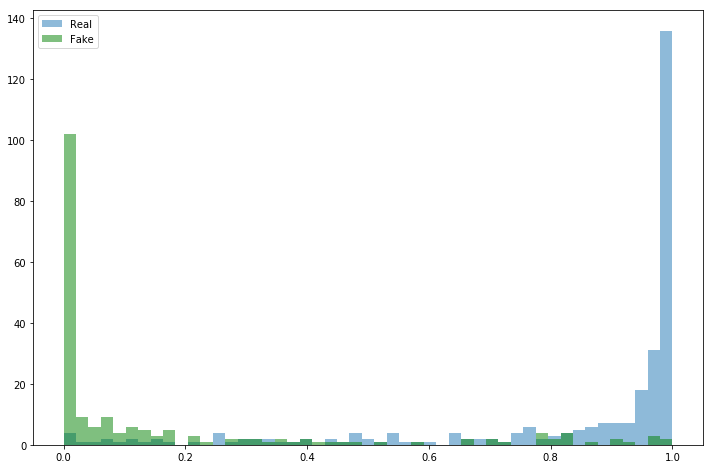

4819
490
(490,)
Real Valid DataSet


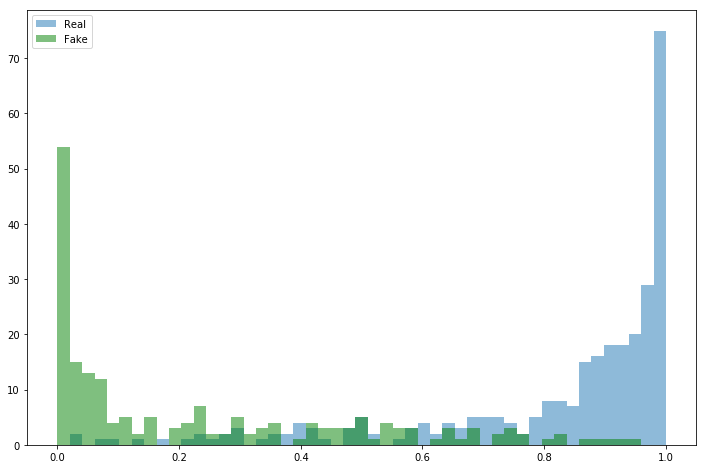

4819
490
(490,)
Real Valid DataSet


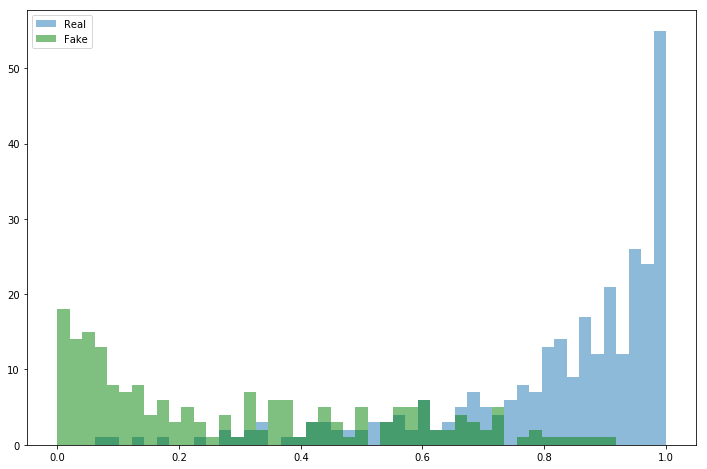

4819
490
(490,)
Real Valid DataSet


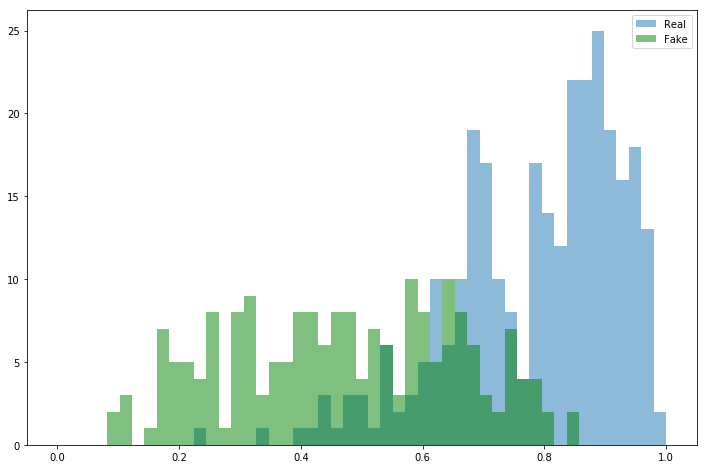

4819
490
(490,)
Real Valid DataSet


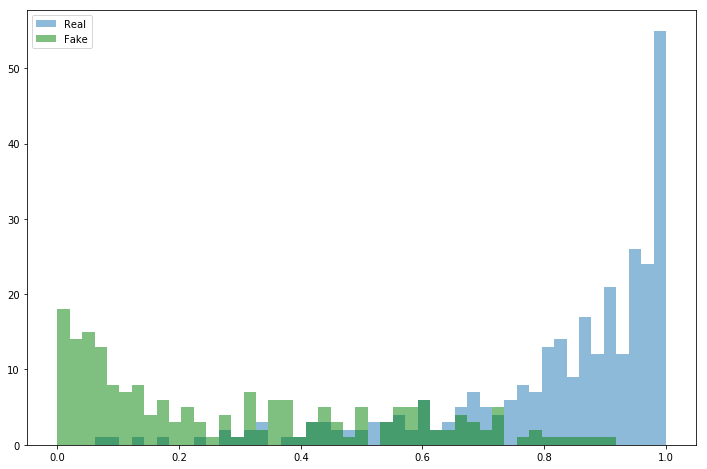

In [9]:
corpuses = [1000,5000,10000,50000,10000]
for val in corpuses:
    prob_real, prob_fake, unique_keys = generate_probs(total_train, delta=0.001, corpus=val)
    #now generate probabilities
    #print(len(valid_r))
    final_guesses = generate_guesses(total_valids, unique_keys, prob_real, prob_fake)

    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot('111')
    bins = np.linspace(0, 1, 50)
    ax.hist(final_guesses[:len(valid_r)], bins = bins, label = "Real", alpha = 0.5)
    #plt.show()
    #bins = np.linspace(0.8, 1, 40)
    ax.hist(final_guesses[len(valid_r):], bins = bins, label = "Fake", alpha = 0.5, color = "green")
    plt.legend()
    plt.show()

4819
490
(490,)
Real Valid DataSet


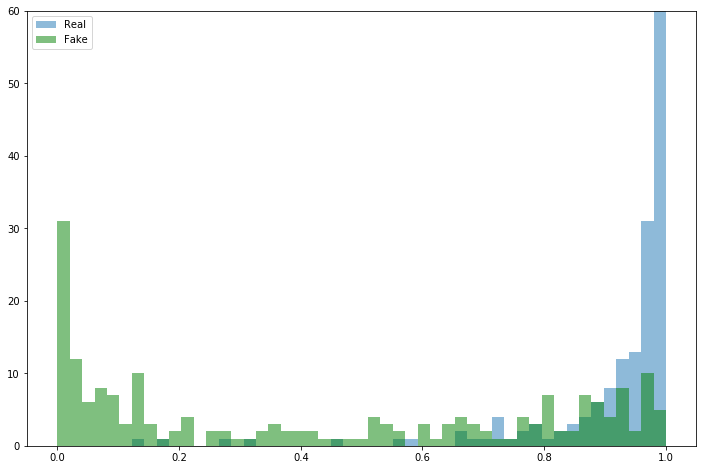

4819
490
(490,)
Real Valid DataSet


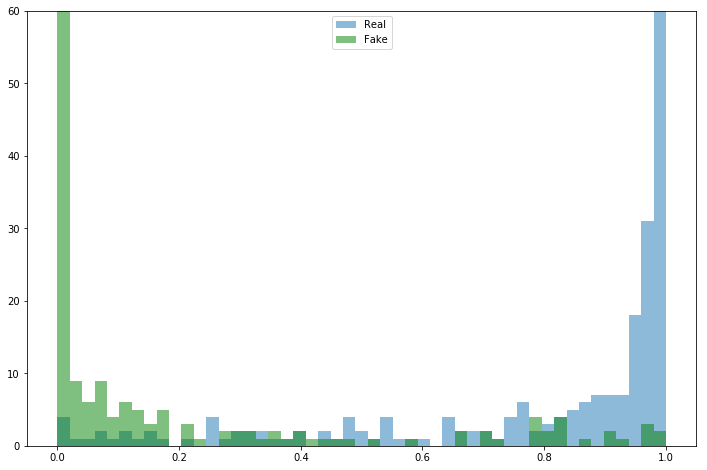

4819
490
(490,)
Real Valid DataSet


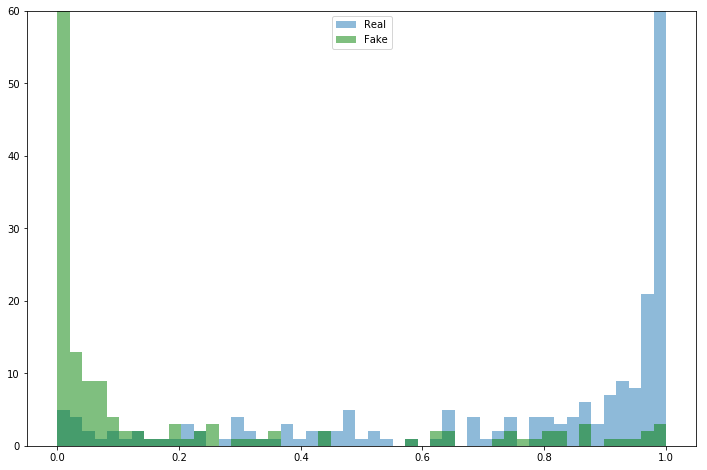

4819
490
(490,)
Real Valid DataSet


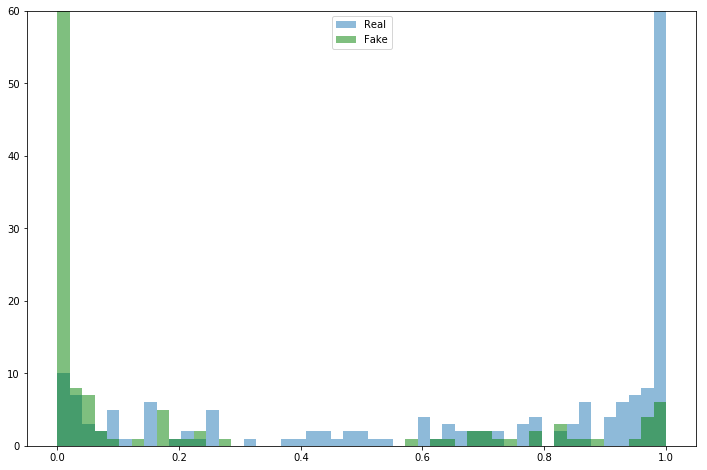

4819
490
(490,)
Real Valid DataSet


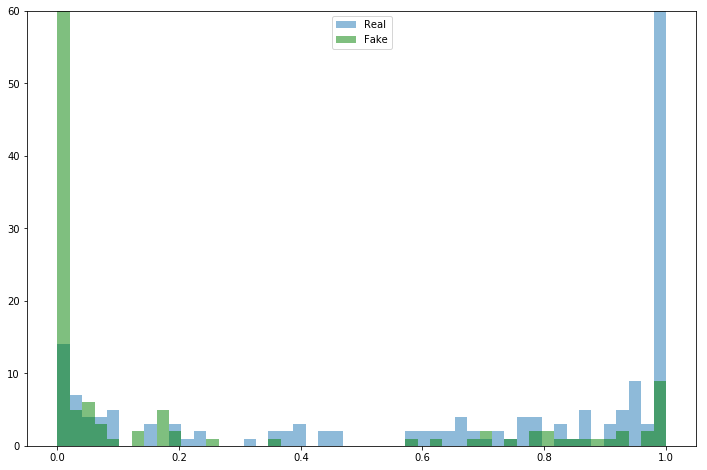

In [10]:
#using the best corpus size, test it with different deltas
#assume that corpus = 10000 was the best
#corpuses = [1000,5000,10000,50000,10000]
delts = [0.005, 0.001, 0.0005, 0.0001, 0.00005]
for d in delts:
    prob_real, prob_fake, unique_keys = generate_probs(total_train, delta=d, corpus=1000)
    #now generate probabilities
    #print(len(valid_r))
    final_guesses = generate_guesses(total_valids, unique_keys, prob_real, prob_fake)

    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot('111')
    bins = np.linspace(0, 1, 50)
    ax.hist(final_guesses[:len(valid_r)], bins = bins, label = "Real", alpha = 0.5)
    #plt.show()
    #bins = np.linspace(0.8, 1, 40)
    ax.hist(final_guesses[len(valid_r):], bins = bins, label = "Fake", alpha = 0.5, color = "green")
    plt.legend()
    plt.ylim([0,60])
    plt.show()

In [11]:
#part 3
prob_real, prob_fake, unique_keys = generate_probs(total_train, delta=d, corpus=1000)

prob_real = [prob_real[k] for k in unique_keys]
prob_fake = [prob_fake[k] for k in unique_keys]

prob_real_vals = np.asarray(prob_real)
prob_real_vals = prob_real_vals.argsort()#[::1]t
real_here = prob_real_vals[:10]
real_gone = prob_real_vals[-10:]

prob_fake_vals = np.asarray(prob_fake)
prob_fake_vals = prob_fake_vals.argsort()
fake_here = prob_fake_vals[:10]
fake_gone = prob_fake_vals[-10:]
#print(real_here)

print(unique_keys[real_here])
print(unique_keys[real_gone])

print(unique_keys[fake_here])
print(unique_keys[fake_gone])
#print(sorted_real_probs)
#print(unique_keys)


4819
['kosher' 'later' 'latino' 'latinos' 'laugh' 'laughing' 'laughter' 'lays'
 'lasting' 'leading']
['for' 'says' 'of' 'on' 'trumps' 'us' 'in' 'to' 'donald' 'trump']
['santa' 'dmz' 'saturday' 'saudi' 'divides' 'saul' 'interest' 'saving'
 'interfered' 'scales']
['is' 'and' 'a' 'of' 'for' 'in' 'donald' 'to' 'the' 'trump']


In [15]:
#load the stop words
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
stop_words = list(ENGLISH_STOP_WORDS)
print(stop_words)

['describe', 'has', 'noone', 'back', 'already', 'nothing', 'thereupon', 'empty', 'anyway', 'being', 'call', 'hers', 'de', 'whose', 'own', 'itself', 'thick', 'herein', 'him', 'will', 'whereafter', 'nor', 'i', 'move', 'the', 'whether', 'please', 'thin', 'across', 'give', 'are', 'above', 'and', 'enough', 'often', 'least', 'too', 'whatever', 'when', 'otherwise', 'whoever', 'is', 'now', 'me', 're', 'onto', 'ourselves', 'further', 'put', 'had', 'any', 'also', 'fire', 'of', 'bill', 'from', 'you', 'anywhere', 'third', 'whereby', 'rather', 'detail', 'top', 'again', 'twelve', 'both', 'eleven', 'ours', 'etc', 'never', 'inc', 'some', 'then', 'became', 'becoming', 'herself', 'than', 'one', 'less', 'there', 'up', 'your', 'because', 'someone', 'while', 'first', 'indeed', 'thence', 'twenty', 'beyond', 'hereafter', 'hence', 'out', 'we', 'ever', 'none', 'who', 'its', 'cannot', 'seemed', 'can', 'they', 'next', 'con', 'could', 'their', 'elsewhere', 'somehow', 'hasnt', 'why', 'each', 'part', 'nobody', 'wou

In [29]:
real_here = prob_real_vals[:20]
real_gone = prob_real_vals[-30:]
real_gone_r = np.flip(real_gone, axis = 0)
fake_here = prob_fake_vals[:20]
fake_gone = prob_fake_vals[-30:]
fake_gone_r = np.flip(fake_gone, axis=0)

#print(unique_keys[real_here])
#print(unique_keys[real_gone])
#print(unique_keys[fake_here])
#print(unique_keys[fake_gone])

tests= [real_here, real_gone, fake_here, fake_gone]
for test in tests:
    #print(test)
    counter = 0
    for word in test:
        test_word = unique_keys[word]
        #counter = 0
        if test_word in stop_words:
            pass
        else:
            print(test_word, end=" ")
            counter +=1
        if counter == 10:
            break
    print("")

kosher later latino latinos laugh laughing laughter lays lasting leading 
turnbull president white russia wall ban korea north clinton election 
santa dmz saturday saudi divides saul saving interfered scales interlude 
america president new obama just election clinton hillary donald trump 
